# 項目：健康保險的交叉銷售預測

資料來源：https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction

## 情境

我們的客戶是一家保險公司，該公司已經為其客戶提供了健康保險，現在他們需要你的幫助來建立一個模型，以預測過去一年中的保單持有人（客戶）是否也會對公司提供的車險感興趣。

保險政策是一種安排，公司承諾在客戶支付指定保費後，為指定的損失、損壞、疾病或死亡提供賠償保證。保費是客戶為獲得這種保證而需要定期支付給保險公司的金額。

例如，你每年可能會支付5000盧比的保費來獲得20萬盧比的健康保險覆蓋，以便如果不幸發生，你在那一年內生病並需要住院，保險公司將承擔高達20萬盧比的住院費用。現在如果你想知道公司是如何在只收取5000盧比保費的情況下承擔如此高的住院費用的，這就涉及到概率的概念。例如，像你一樣，可能有100位客戶每年支付5000盧比的保費，但其中只有少數（例如2-3人）會在那一年住院，而不是所有人都會住院。這樣，每個人都在分擔彼此的風險。

就像健康保險一樣，車險也要求客戶每年支付一定數額的保費，這樣在車輛不幸發生事故時，保險公司將向客戶提供賠償（稱為“保額”）。

建立一個預測客戶是否會對車險感興趣的模型對公司非常有幫助，因為這樣公司可以相應地制定溝通策略，聯繫這些客戶，並優化其業務模式和收入。

現在，為了預測客戶是否會對車險感興趣，你擁有關於人口統計信息（性別、年齡、地區代碼類型）、車輛信息（車齡、損壞情況）、保單信息（保費、銷售渠道）等數據。

## 資料描述

1. `id`：客戶的唯一ID
2. `Gender`：客戶的性別
3. `Age`：客戶的年齡
4. `Driving_License`：0：客戶沒有駕駛執照，1：客戶已經有駕駛執照
5. `Region_Code`：客戶所在地區的唯一代碼
6. `Previously_Insured`：1：客戶已經擁有車險，0：客戶沒有車險
7. `Vehicle_Age`：車輛的年齡
8. `Vehicle_Damage`：1：客戶的車輛過去曾經損壞，0：客戶的車輛過去未曾損壞
9. `Annual_Premium`：客戶每年需要支付的保費金額
10. `Policy_Sales_Channel`：接觸客戶的渠道的匿名代碼，例如不同的代理人、郵件、電話、面對面等
11. `Vintage`：客戶與公司建立關係的天數
12. `Response`：1：客戶感興趣，0：客戶不感興趣

## 分析目標

1. 預測擁有健康險的客戶中，哪些客戶可能對車險感興趣  
2. 影響擁有健康險的客戶，對於車險有興趣的關鍵因素是什麼
3. 不同客群，對車險的興趣差異如何
4. 現有的車險客戶特徵與潛在車險客戶的區別
5. 如何優化年度保費定價以吸引更多客戶
6. 客戶維持時間與購買車險興趣的關係
7. 哪種渠道對於吸引客戶對車險感興趣方面最有效

## 讀取數據

引入數據分析所需的函式庫

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

透過Pandas的`read_csv`函數，讀取原始數據文件`train.csv`裡的數據內容，解析為DataFrame併賦值給變量`original_data`。

In [2]:
original_data = pd.read_csv("data/train.csv")
original_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 資料評估與清洗

這一部分中，將對`original_data`的數據進行評估和清洗。

主要從結構（整齊度）和內容（乾淨度）的兩個方面進行。

數據結構，須符合以下標準：

1. 每個變量為一列（column）
2. 每個觀察值為一行（row）
3. 每種類型的觀察單位為一個表格

數據內容的問題：

1. 缺失的數據
2. 重複的數據
3. 不一致的數據
4. 無效或錯誤的數據

為了區分經過清洗的數據與原始的數據，建立新的變量`cleaned_data`，該變量為`original_data`的副本，後續的清洗步驟都僅操作`cleaned_data`。

In [3]:
cleaned_data = original_data.copy()

### 數據整齊度

In [4]:
cleaned_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


從前5行的數據看起來，皆符合數據結構標準，因此不存在結構性問題。

### 數據乾淨度

透過`info()`對數據進行初步暸解。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
cleaned_data["id"] = cleaned_data["id"].astype("string")
cleaned_data["Driving_License"] = cleaned_data["Driving_License"].astype("category")
cleaned_data["Region_Code"] = cleaned_data["Region_Code"].astype("int").astype("category")
cleaned_data["Previously_Insured"] = cleaned_data["Previously_Insured"].astype("category")
cleaned_data["Vehicle_Age"] = cleaned_data["Vehicle_Age"].astype("category")
cleaned_data["Vehicle_Damage"] = cleaned_data["Vehicle_Damage"].astype("category")
cleaned_data["Policy_Sales_Channel"] = cleaned_data["Policy_Sales_Channel"].astype("int").astype("category")
cleaned_data["Response"] = cleaned_data["Response"].astype("category")

因欄位`Driving_License`、`Region_Code`、`Previously_Insured`、`Vehicle_Age`、`Vehicle_Damage`、`Policy_Sales_Channel`及`Response`的內容特性，將型態轉為category。

#### 處理缺失數據

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  string  
 1   Gender                381109 non-null  object  
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  category
 4   Region_Code           381109 non-null  category
 5   Previously_Insured    381109 non-null  category
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  category
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  category
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  category
dtypes: category(7), float64(1), int64(2), object(1), string(1)
memory usage: 17.5+ MB


透過info的結果來看，不存在缺失數據的問題。

#### 處理重複數據

根據數據變量的涵義與內容來看，`id`是客戶的唯一指標，不應該存在重複的值，因此查看是否存在重複值。

In [8]:
cleaned_data["id"].duplicated().sum()

np.int64(0)

輸出結果為0，說明不存在重複數據。

#### 處理不一致數據

In [9]:
cleaned_data["Gender"].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [10]:
cleaned_data["Driving_License"].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [11]:
cleaned_data["Region_Code"].value_counts()

Region_Code
28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
31      1960
23      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: count, dtype: int64

In [12]:
cleaned_data["Previously_Insured"].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [13]:
cleaned_data["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [14]:
cleaned_data["Vehicle_Damage"].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [15]:
cleaned_data["Policy_Sales_Channel"].value_counts()

Policy_Sales_Channel
152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
84          1
123         1
144         1
143         1
Name: count, Length: 155, dtype: int64

In [16]:
cleaned_data["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

從以上的輸出結果來看，皆不存在不一致的數據。

#### 處理無效或錯誤數據

In [17]:
cleaned_data.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


從以上的結果來看，不存在脫離現實的數值。

## 整理數據

無。

## 探索數據

In [18]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

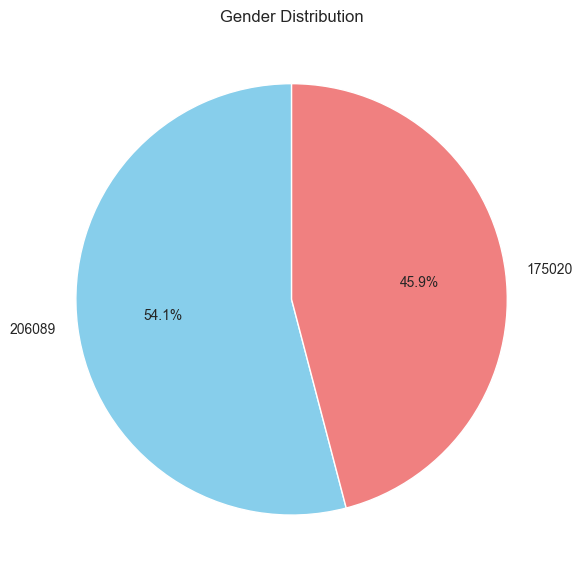

In [19]:
gender_counts = cleaned_data["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts, autopct="%1.1f%%", colors=["skyblue", "lightcoral"], startangle=90)
plt.title("Gender Distribution")
plt.show()

說明：

- 男性（藍色部分）：占總數的54.1%，對應於206089人。  
- 女性（紅色部分）：占總數的45.9%，對應於175020人。

小結：

男性客戶的比例略高於女性客戶。

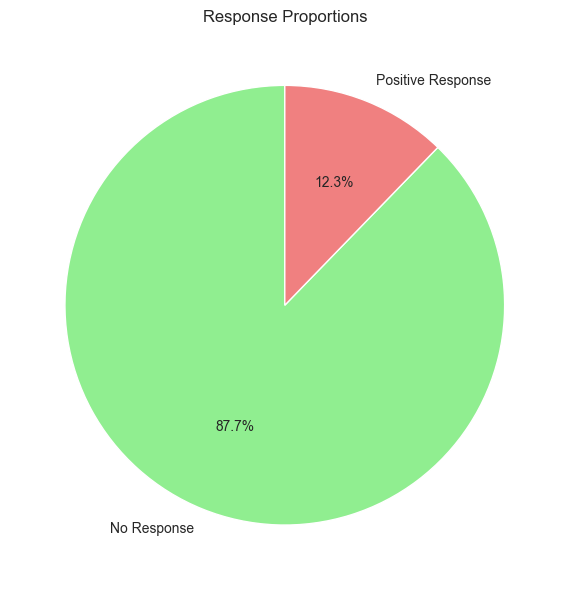

In [20]:
response_counts = cleaned_data["Response"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=["No Response", "Positive Response"], autopct="%1.1f%%", colors=["lightgreen", "lightcoral"], startangle=90)
plt.title("Response Proportions")
plt.show()

說明：

- No Response（綠色部分）：占總數的87.7%。這表示大部分客戶（87.7%）對購買車險沒有興趣，即數據中的Response值為0。
- Positive Response（紅色部分）：占總數的12.3%。這表示僅有一小部分客戶（12.3%）對購買車險表示了興趣，即數據中的Response值為1。

小結：

這樣的分布顯示了潛在車險客戶的興趣程度普遍較低，公司可能需要更加精確的營銷策略來吸引更多客戶對車險產生興趣。這也表明了在模型構建中，正樣本（對車險感興趣的客戶）占比較低。

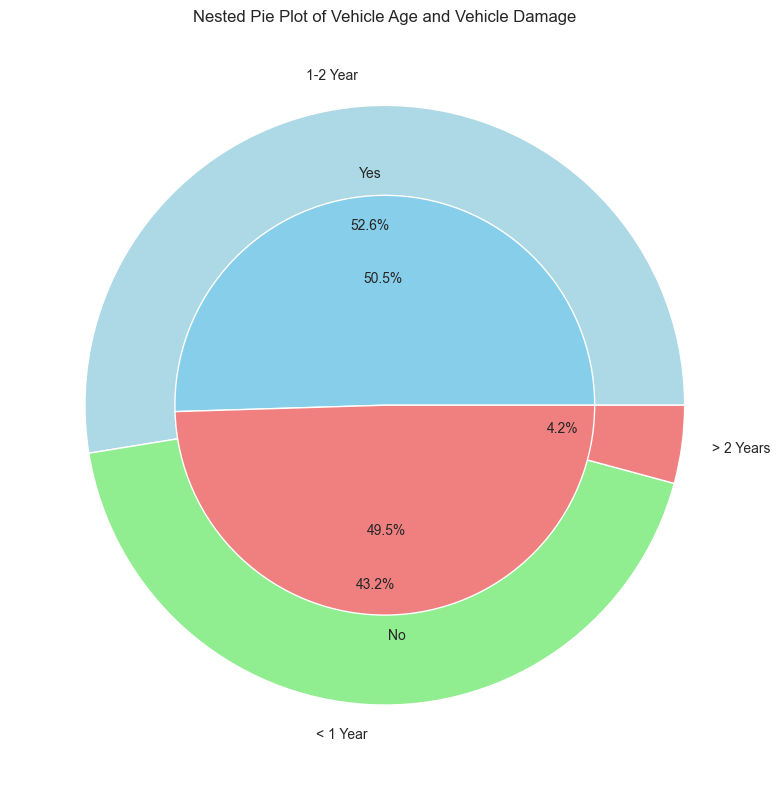

In [21]:
vehicle_age_counts = cleaned_data["Vehicle_Age"].value_counts()
vehicle_damage_counts = cleaned_data["Vehicle_Damage"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct="%1.1f%%", colors=["lightblue", "lightgreen", "lightcoral"], radius=1)
ax.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct="%1.1f%%", colors=["skyblue", "lightcoral"], radius=0.7)
ax.set(aspect="equal", title="Nested Pie Plot of Vehicle Age and Vehicle Damage")
plt.show()

=== [ 圖片故事 ] ===

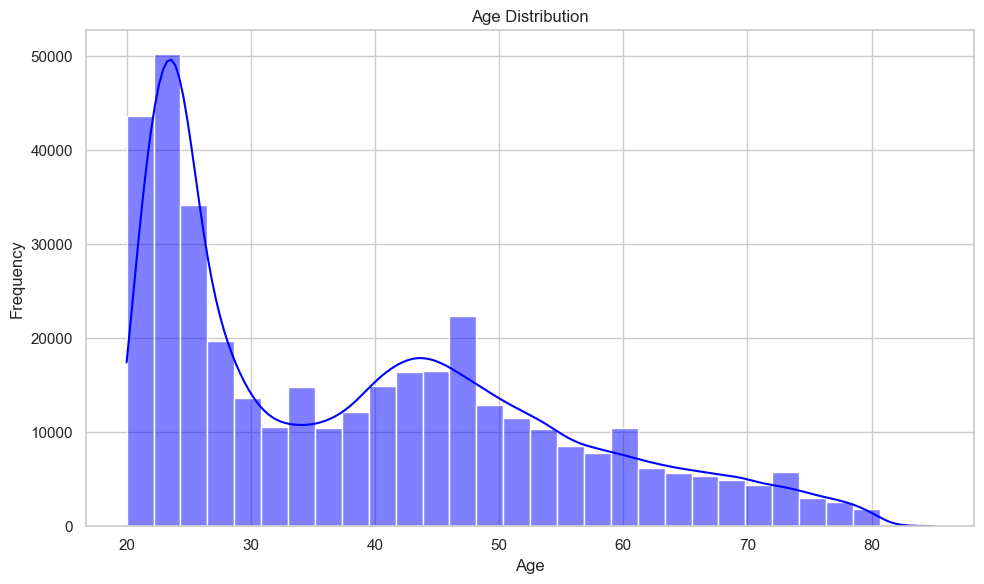

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["Age"], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

這個柱狀圖顯示了數據集中客戶年齡的分佈情況。

- X軸：表示年齡範圍，從20歲到80多歲不等。
- Y軸：表示該年齡段的客戶數量（頻率）。

說明：

- 年齡在20至25歲之間的客戶數量最多，達到最高峰，顯示出這個年齡段的客戶在數據集中占比較大。
- 在25歲後，客戶數量逐漸下降，直到 30歲左右 出現一個小低谷。
- 40至50歲之間 的客戶數量有所回升，這段時間內有一個較小的高峰。
- 50歲以後，客戶數量又開始下降，年齡越大，數量越少。

小結： 

這種年齡分佈可能反映了客戶的保險需求隨年齡的變化。年輕人可能剛開始獨立生活，因此車險需求較高，而中年階段的需求也不低。隨著年齡的增長，特別是50歲之後，客戶對車險的需求逐漸減少。這對於公司制定針對不同年齡段的客戶的營銷策略提供了重要參考。

/var/folders/_2/gx8y5f352h14d0fm7wd9dpzc0000gn/T/ipykernel_1502/843394771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Driving_License", data=cleaned_data, palette="Set2")


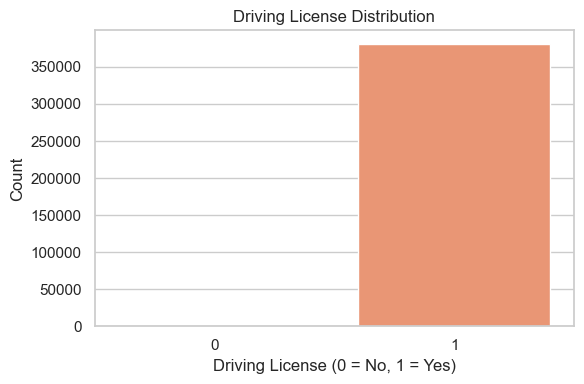

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Driving_License", data=cleaned_data, palette="Set2")
plt.title("Driving License Distribution")
plt.xlabel("Driving License (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

這個柱狀圖顯示了數據集中客戶是否擁有駕駛執照（Driving License）的分佈情況。

- X軸：表示駕駛執照的持有情況，其中0表示沒有駕駛執照，1表示有駕駛執照。
- Y軸：表示對應駕駛執照情況的客戶數量。

說明：

- 絕大多數的客戶（接近350000人）擁有駕駛執照（Driving License = 1）。
- 幾乎沒有客戶在數據集中是沒有駕駛執照的（Driving License = 0）。

小結：

這個分佈表明，幾乎所有客戶都擁有駕駛執照，這對於公司推廣車險來說是一個有利因素，因為持有駕駛執照的客戶更有可能成為車險的潛在客戶。

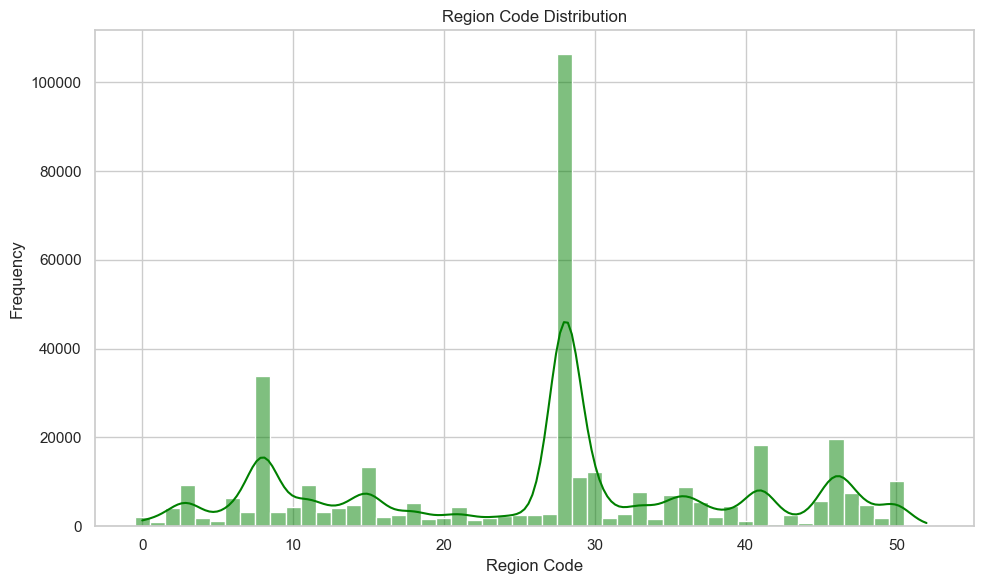

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["Region_Code"], bins=30, kde=True, color="green")
plt.title("Region Code Distribution")
plt.xlabel("Region Code")
plt.ylabel("Frequency")
plt.show()

這個柱狀圖顯示了數據集中不同地區代碼（Region Code）的分佈情況。

- X軸：表示地區代碼（Region Code），範圍從0到50多。
- Y軸：表示每個地區代碼對應的客戶數量（頻率）。

說明：

- 地區代碼的分布並不均勻，有明顯的集中趨勢。特別是代碼 28 的地區，有非常多的客戶，數量遠超過其他地區，超過100000人。
- 另外一些地區代碼（如9和30左右）也有較高的客戶數量，但整體上分布不如28號地區那麼集中。
- 其他地區的客戶數量相對較少，分佈較為分散。

小結：

這樣的分佈可能反映了在這些特定地區中，公司有更高的市場滲透率或這些地區的保險需求更高。公司可以針對客戶集中的地區進行更有針對性的營銷策略，以進一步提高保險銷售量。另一方面，對於客戶較少的地區，可能需要探索是否存在開發潛力。

/var/folders/_2/gx8y5f352h14d0fm7wd9dpzc0000gn/T/ipykernel_1502/3608256898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Previously_Insured", data=cleaned_data, palette="Set1")


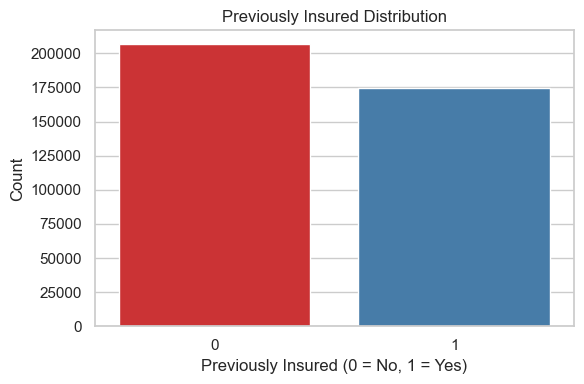

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Previously_Insured", data=cleaned_data, palette="Set1")
plt.title("Previously Insured Distribution")
plt.xlabel("Previously Insured (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

這個柱狀圖顯示了數據集中客戶是否已經擁有車險的分佈情況。

- X軸：表示是否已有車險，0 表示沒有車險，1 表示已有車險。
- Y軸：表示對應選項下的客戶數量。

說明：

- 超過 200,000 名客戶目前沒有車險（Previously Insured = 0），這意味著這些客戶是潛在的車險市場。
- 大約有 175,000 名客戶已經擁有車險（Previously Insured = 1）。

小結：

這個分佈說明，儘管已有一部分客戶擁有車險，但仍然有更大比例的客戶目前並沒有購買車險，這提供了巨大的市場潛力。這些沒有車險的客戶可能對購買車險有一定的興趣，公司可以針對這部分客戶進行更加有效的推廣，以提高車險的滲透率。

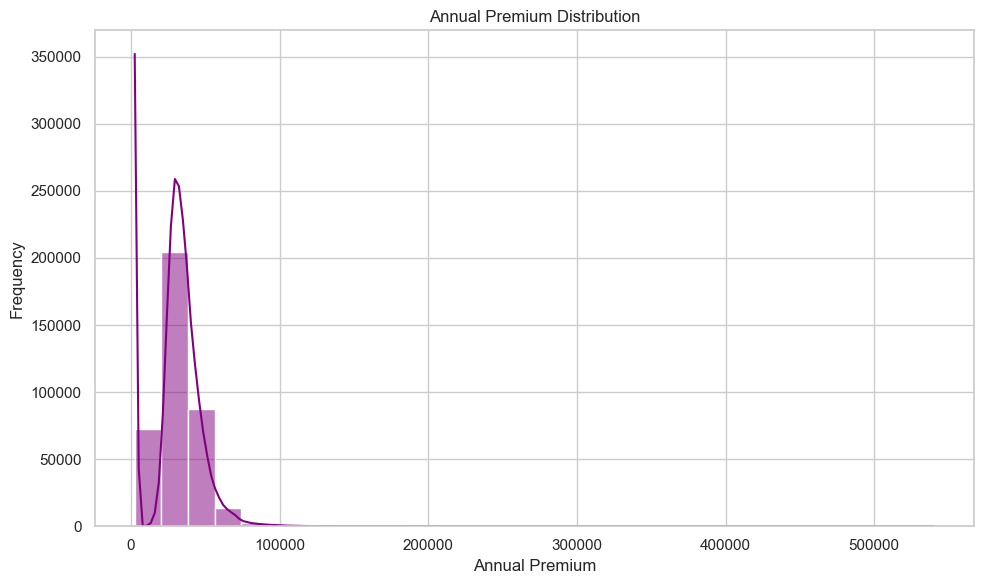

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["Annual_Premium"], bins=30, kde=True, color="purple")
plt.title("Annual Premium Distribution")
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

這個圖顯示了數據集中年度保費（Annual Premium）的分佈情況。

- X軸：表示年度保費的金額範圍，從0到500000以上。
- Y軸：表示在該保費區間內的客戶數量（頻率）。

說明：

- 大多數客戶的年度保費集中在0到100000之間，且集中度非常高。
- 在接近20000到40000的區間內，出現了頻率的高峰，這說明這個區間的保費是最多客戶選擇的。
- 隨著保費的增加，客戶的數量迅速減少，這意味著高額保費的客戶相對較少。

小結：

這個分佈圖表明，大部分客戶選擇的保險保費集中在一個較低的範圍內，而少數客戶選擇了較高的保費。這可能是因為較低的保費更能夠吸引大多數客戶，也可能是市場上大部分產品的定價都集中在這個區間內。對於公司來說，了解客戶的保費選擇有助於設計更符合市場需求的保險產品，並針對不同的客戶群體提供差異化的產品和服務。

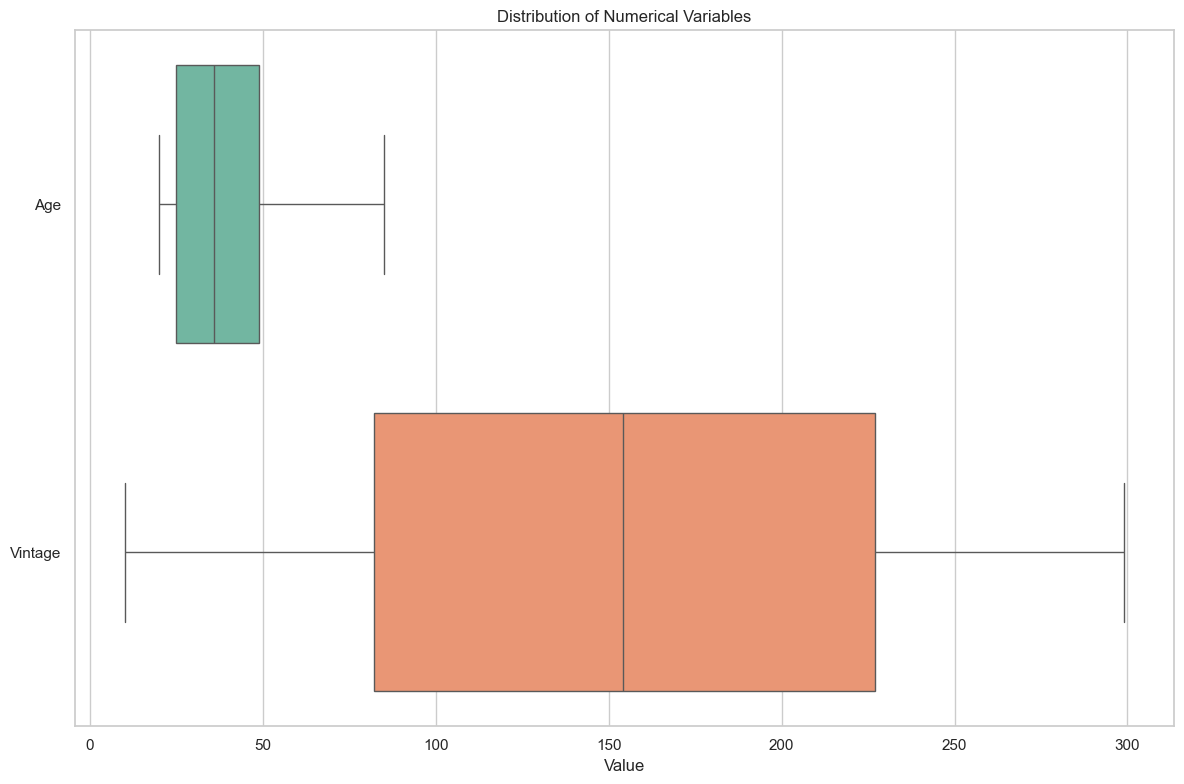

In [27]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                  'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data[numerical_cols], orient='h', palette='Set2')
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

這個箱線圖顯示了數據集中兩個數值型變量的分佈情況：年齡（Age）和與公司建立關係的天數（Vintage）。

- X軸：表示數值的大小（Value）。
- Y軸：表示兩個變量，分別是 Age 和 Vintage。

說明：

- Age（年齡）：
- 年齡的中位數約在35歲左右（圖中的中線）。
- 箱體顯示了數據的四分位範圍，大部分客戶的年齡集中在25歲到45歲之間。
- 箱體外的鬍鬚表示數據的範圍，顯示出年齡分佈的一些離群值。
- Vintage（與公司建立關係的天數）：
- Vintage 的中位數約在150天左右（圖中的中線）。
- 與年齡相比，Vintage的數據分佈範圍更廣，且數據分佈較為均勻，顯示出部分客戶已經與公司建立了較長時間的關係，而一些客戶則剛剛加入。

小結：

這些箱線圖幫助我們了解這兩個變量的集中趨勢和分佈範圍。年齡和Vintage的不同分佈可以用來分析這些變量對客戶行為（例如購買車險）的影響，並且可以幫助公司根據不同年齡段和不同關係長度的客戶制定有針對性的營銷策略。

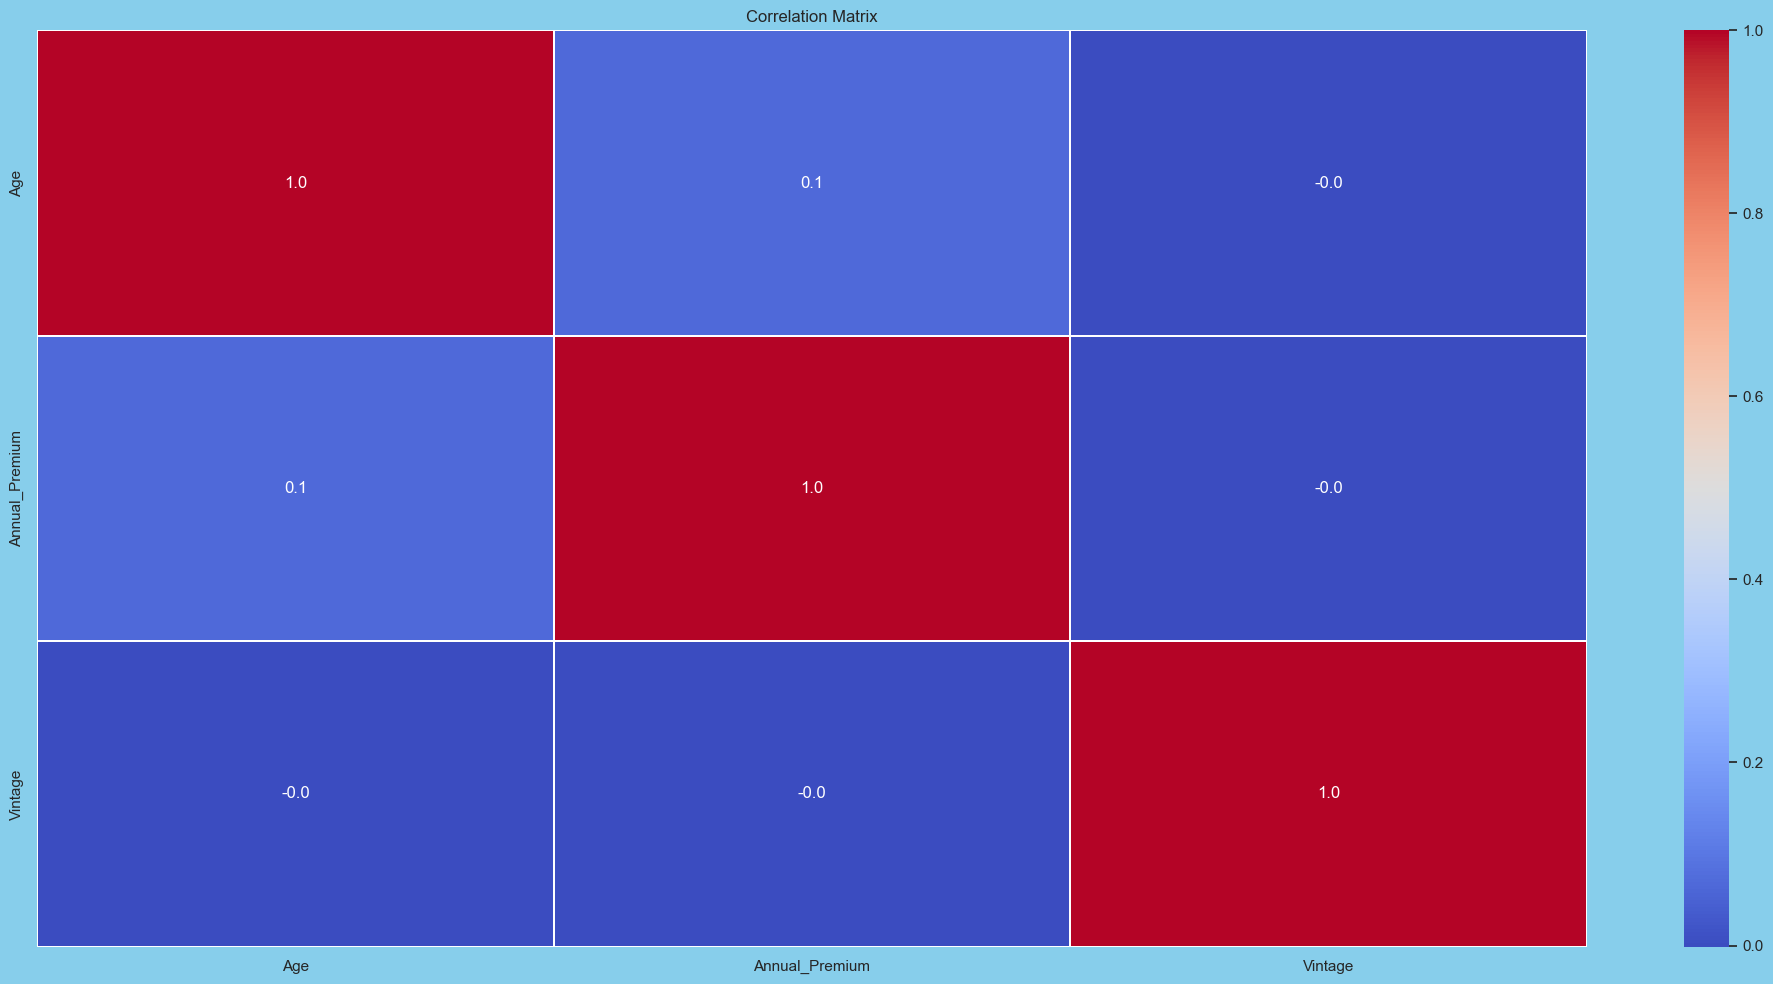

In [28]:
correlation_matrix = cleaned_data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.1)
plt.gcf().set_facecolor('skyblue')
plt.title("Correlation Matrix")
plt.show()

這個熱力圖顯示了數據集中三個數值型變量之間的相關性矩陣：年齡（Age）、年度保費（Annual Premium）和與公司建立關係的天數（Vintage）。

- 相關性系數：範圍從-1到1。1表示完全正相關，-1表示完全負相關，0表示沒有相關性。
- X軸和Y軸：分別顯示了變量名稱（Age, Annual Premium, Vintage）。

說明：

- Age與Annual Premium的相關性系數約為0.1，這表示它們之間有非常弱的正相關。
- Age與Vintage的相關性幾乎為0，表示這兩個變量之間沒有明顯的相關性。
- Annual Premium與Vintage的相關性也幾乎為0，表示它們之間沒有相關性。

小結：

這些結果表明，這三個變量之間的相關性都很低，這意味著它們可能是相對獨立的特徵。

## 分析數據

### 預測擁有健康險的客戶中，哪些客戶可能對車險感興趣

### 影響擁有健康險的客戶，對於車險有興趣的關鍵因素是什麼

### 不同客群，對車險的興趣差異如何

### 現有的車險客戶特徵與潛在車險客戶的區別

### 如何優化年度保費定價以吸引更多客戶

### 客戶維持時間與購買車險興趣的關係

### 哪種渠道對於吸引客戶對車險感興趣方面最有效